In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#1.Load data dan gabungkan kedua data menjadi dataframe

In [ ]:
df_1 = pd.read_excel("tweets_7.xlsx")
df_2 = pd.read_excel("tweets_8.xlsx")

In [ ]:
df_1.head()

,Username,Retweeted User,Mentioned Users,Tweet
0,reifeiza,NaN,[],Prabowo bikin kagum di Shangri-La Dialogue! Pi...
1,unedo18,HusinShihab,"['HusinShihab', 'PDI_Perjuangan', 'jokowi', 'g...",RT @HusinShihab: Saya sepakat dgn @PDI_Perjuan...
2,SolehMr1,NaN,"['TarungHobby', 'aniesbaswedan', 'JRMK_Jakarta...",@TarungHobby @aniesbaswedan @JRMK_Jakarta @urb...
3,adzaniamedikasr,NaN,[],Prabowo bikin kagum di Shangri-La Dialogue! Pi...
4,dimasnvll,NaN,[],Pidato Prabowo di Shangri-La Dialogue kemarin ...


In [ ]:
df_1.shape

(1000, 4)

In [ ]:
df_1['Username1'] = df_1['Username']
df_1['Retweet1'] = df_1['Retweeted User']
df_1['Mentioned1'] = df_1['Mentioned Users']

In [ ]:
df_2.head()

,Username,Retweeted User,Mentioned Users,Retweet Count
0,PolsekPtkUtara,UNPOL,"['UNPOL', 'UNPOL']",52
1,humassekptkutr,UNPOL,"['UNPOL', 'UNPOL']",52
2,humas_sajira,UNPOL,"['UNPOL', 'UNPOL']",52
3,BidhumasKalbar,UNPOL,"['UNPOL', 'UNPOL']",52
4,Humasressanggau,UNPOL,"['UNPOL', 'UNPOL']",52


In [ ]:
df_2.shape

(1000, 4)

In [ ]:
df_2['Username2'] = df_2['Username']
df_2['Retweet2'] = df_2['Retweeted User']
df_2['Mentioned2'] = df_2['Mentioned Users']

In [ ]:
df = pd.concat([df_1, df_2], axis=1)

In [ ]:
df.head()

,Username,Retweeted User,Mentioned Users,Tweet,Username1,Retweet1,Mentioned1,Username,Retweeted User,Mentioned Users,Retweet Count,Username2,Retweet2,Mentioned2
0,reifeiza,NaN,[],Prabowo bikin kagum di Shangri-La Dialogue! Pi...,reifeiza,NaN,[],PolsekPtkUtara,UNPOL,"['UNPOL', 'UNPOL']",52,PolsekPtkUtara,UNPOL,"['UNPOL', 'UNPOL']"
1,unedo18,HusinShihab,"['HusinShihab', 'PDI_Perjuangan', 'jokowi', 'g...",RT @HusinShihab: Saya sepakat dgn @PDI_Perjuan...,unedo18,HusinShihab,"['HusinShihab', 'PDI_Perjuangan', 'jokowi', 'g...",humassekptkutr,UNPOL,"['UNPOL', 'UNPOL']",52,humassekptkutr,UNPOL,"['UNPOL', 'UNPOL']"
2,SolehMr1,NaN,"['TarungHobby', 'aniesbaswedan', 'JRMK_Jakarta...",@TarungHobby @aniesbaswedan @JRMK_Jakarta @urb...,SolehMr1,NaN,"['TarungHobby', 'aniesbaswedan', 'JRMK_Jakarta...",humas_sajira,UNPOL,"['UNPOL', 'UNPOL']",52,humas_sajira,UNPOL,"['UNPOL', 'UNPOL']"
3,adzaniamedikasr,NaN,[],Prabowo bikin kagum di Shangri-La Dialogue! Pi...,adzaniamedikasr,NaN,[],BidhumasKalbar,UNPOL,"['UNPOL', 'UNPOL']",52,BidhumasKalbar,UNPOL,"['UNPOL', 'UNPOL']"
4,dimasnvll,NaN,[],Pidato Prabowo di Shangri-La Dialogue kemarin ...,dimasnvll,NaN,[],Humasressanggau,UNPOL,"['UNPOL', 'UNPOL']",52,Humasressanggau,UNPOL,"['UNPOL', 'UNPOL']"


In [ ]:
data = pd.DataFrame(columns=['username', 'retweet'])

In [ ]:
data['username'] = pd.concat([df['Username1'], df['Username2']], axis=0)
data['retweet'] = pd.concat([df['Retweet1'] + df['Retweet2']], axis=0)

In [ ]:
data.head()

,username,retweet
0,reifeiza,NaN
1,unedo18,HusinShihabUNPOL
2,SolehMr1,NaN
3,adzaniamedikasr,NaN
4,dimasnvll,NaN


In [ ]:
data.tail()

,username,retweet
995,NOLEGGIN,NaN
996,ivansiregar18,NaN
997,golora7,NaN
998,EgoriaAl,NaN
999,SantoLeto,NaN


In [ ]:
data.shape

(2000, 2)

In [ ]:
data['retweet'] = data['retweet'].fillna(data['username'])

In [ ]:
data.head()

,username,retweet
0,reifeiza,reifeiza
1,unedo18,HusinShihabUNPOL
2,SolehMr1,SolehMr1
3,adzaniamedikasr,adzaniamedikasr
4,dimasnvll,dimasnvll


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  2000 non-null   object
 1   retweet   2000 non-null   object
dtypes: object(2)
memory usage: 46.9+ KB


Data telah disatukan menjadi satu dataframe dengan menghapus kolom lainnya\
Data kini tersisa dua kolom, yaitu username (hasil penggabungan username 1 dan username 2). kemudian retweet (hasil penggabungan retweet 1 dan retweet2)

#2. Hitung nilai centrality-nya: (bobot: masing- masing 10 point)\
A. Betweenees centrality dan gambarkan graph SNA nya.\
B. Closeness centrality gambarkan graph SNA nya.\
C. Degree centrality nya gambarkan graph SNA nya.\
D. Eigen Centralitynya nya gambarkan graph SNA nya.\
E. HITS centrality nya gambarkan graph SNA nya.\
F. Page rank centrality nya gambarkan graph SNA nya.\
G. Modularity Centrality nya gambarkan graph SNA nya.*italicised text*

In [ ]:
G = nx.Graph()

G = nx.from_pandas_edgelist(data, source='username', target='retweet')

In [ ]:
from networkx.algorithms import community
from networkx.algorithms import link_analysis


#Jawab 2A

Betweenees centrality dan gambarkan graph SNA nya.

In [ ]:
# Menghitung derajat sentralitas (degree centrality)
betweenness_centrality = nx.betweenness_centrality(G)

# Menampilkan entitas dengan degree centrality tertinggi
highest_degree = max(betweenness_centrality, key= betweenness_centrality.get)
print("Entitas dengan betweennes centrality tertinggi:", highest_degree)

Entitas dengan betweennes centrality tertinggi: i_prabowo


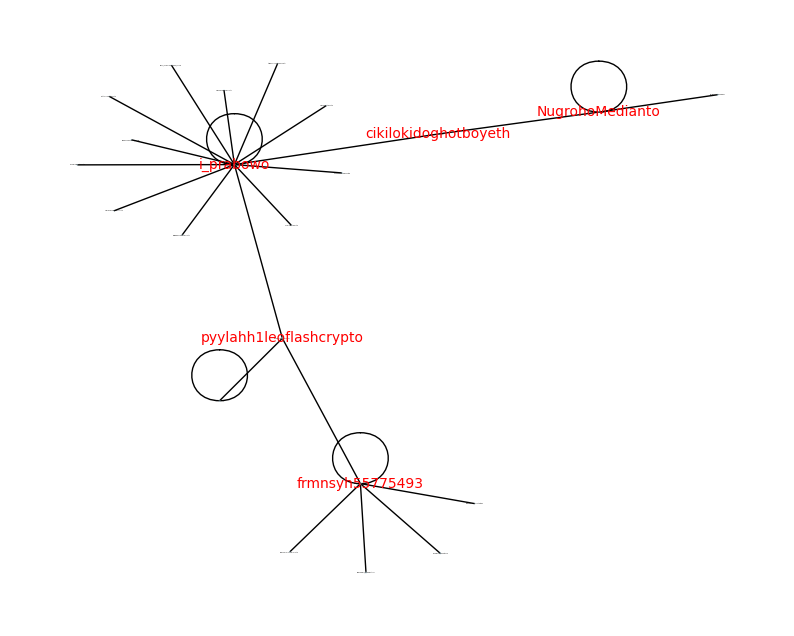

In [ ]:
plt.figure(figsize=(10, 8))

# Menentukan posisi entitas pada grafik
pos = nx.spring_layout(G, k=0.7)

# Menghitung betweenness_centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Mengurutkan simpul berdasarkan betweenness_centrality secara menurun
sorted_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)

# Memilih top 5 simpul dengan betweenness_centrality tertinggi
top_nodes = sorted_nodes[:5]

# Membuat subgraf berisi simpul top 5 dan tetangganya
subgraph_nodes = top_nodes.copy()
for node in top_nodes:
    subgraph_nodes += list(G.neighbors(node))
subgraph_nodes = list(set(subgraph_nodes))  # Menghilangkan duplikat simpul
subgraph = G.subgraph(subgraph_nodes)

# Mengatur ukuran node berdasarkan betweenness_centrality
node_size = [50 * betweenness_centrality[node] for node in subgraph.nodes]

# Menggambar graf
pos = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, pos, with_labels=True, node_size=node_size, node_color='lightblue', font_color='black', font_size=1)

# Menambahkan label pada simpul top 5
labels = {node: node for node in top_nodes}
nx.draw_networkx_labels(subgraph, pos, labels, font_color='red', font_size=10)

# Menampilkan graf
plt.axis('off')
plt.show()


#Jawab 2B

Closeness centrality gambarkan graph SNA nya.

In [ ]:
# Menghitung derajat sentralitas (closeness_centrality)
closeness_centrality = nx.closeness_centrality(G)

# Menampilkan entitas dengan closeness_centrality tertinggi
highest_degree = max(closeness_centrality, key= closeness_centrality.get)
print("Entitas dengan closeness centrality tertinggi:", highest_degree)

Entitas dengan closeness centrality tertinggi: i_prabowo


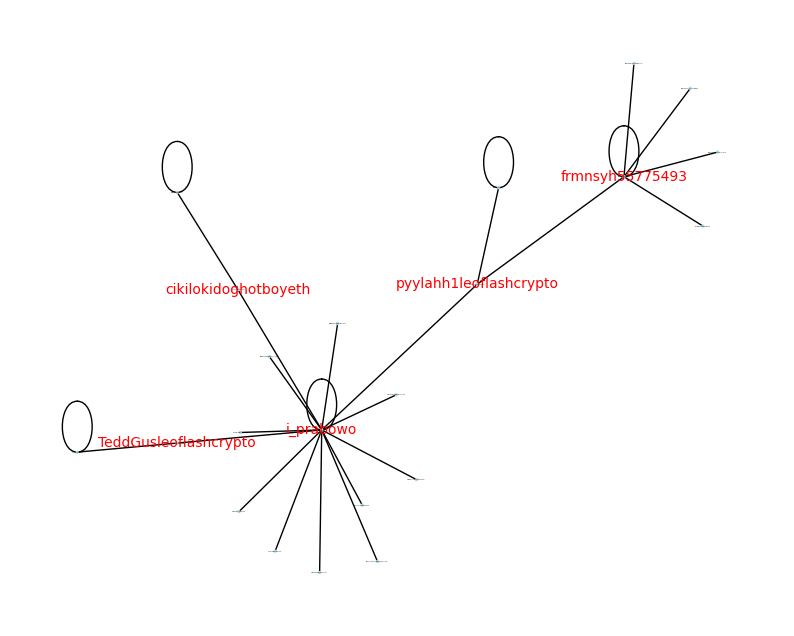

In [ ]:
plt.figure(figsize=(10, 8))

# Menentukan posisi entitas pada grafik
pos = nx.spring_layout(G, k=0.7)

# Menghitung closeness_centrality
closeness_centrality = nx.closeness_centrality(G)

# Mengurutkan simpul berdasarkan closeness_centralitysecara menurun
sorted_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)

# Memilih top 5 simpul dengan closeness_centrality tertinggi
top_nodes = sorted_nodes[:5]

# Membuat subgraf berisi simpul top 5 dan tetangganya
subgraph_nodes = top_nodes.copy()
for node in top_nodes:
    subgraph_nodes += list(G.neighbors(node))
subgraph_nodes = list(set(subgraph_nodes))  # Menghilangkan duplikat simpul
subgraph = G.subgraph(subgraph_nodes)

# Mengatur ukuran node berdasarkan closeness_centrality
node_size = [100 * closeness_centrality[node] for node in subgraph.nodes]

# Menggambar graf
pos = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, pos, with_labels=True, node_size=node_size, node_color='lightblue', font_color='black', font_size=1)

# Menambahkan label pada simpul top 5
labels = {node: node for node in top_nodes}
nx.draw_networkx_labels(subgraph, pos, labels, font_color='red', font_size=10)

# Menampilkan graf
plt.axis('off')
plt.show()


#Jawab 2C

Degree centrality nya gambarkan graph SNA nya.

In [ ]:
# Menghitung derajat sentralitas (degree centrality)
degree_centrality = nx.degree_centrality(G)

# Menampilkan entitas dengan degree centrality tertinggi
highest_degree = max(degree_centrality, key= degree_centrality.get)
print("Entitas dengan degree centrality tertinggi:", highest_degree)

Entitas dengan degree centrality tertinggi: i_prabowo


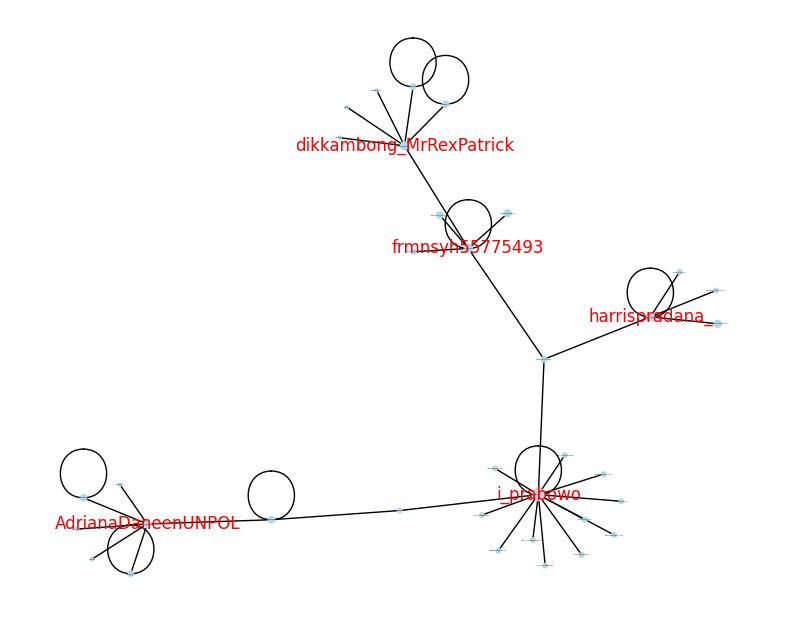

In [ ]:
plt.figure(figsize=(10, 8))

# Menentukan posisi entitas pada grafik
pos = nx.spring_layout(G, k=0.7)

# Menghitung Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Mengurutkan simpul berdasarkan Degree Centrality secara menurun
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

# Memilih top 5 simpul dengan Degree Centrality tertinggi
top_nodes = sorted_nodes[:5]

# Membuat subgraf berisi simpul top 5 dan tetangganya
subgraph_nodes = top_nodes.copy()
for node in top_nodes:
    subgraph_nodes += list(G.neighbors(node))
subgraph_nodes = list(set(subgraph_nodes))  # Menghilangkan duplikat simpul
subgraph = G.subgraph(subgraph_nodes)

# Mengatur ukuran node berdasarkan Degree Centrality
node_size = [5000 * degree_centrality[node] for node in subgraph.nodes]

# Menggambar graf
pos = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, pos, with_labels=True, node_size=node_size, node_color='lightblue', font_color='black', font_size=1)

# Menambahkan label pada simpul top 5
labels = {node: node for node in top_nodes}
nx.draw_networkx_labels(subgraph, pos, labels, font_color='red', font_size=12)

# Menampilkan graf
plt.axis('off')
plt.show()


#Jawab 2D

Eigen Centralitynya nya gambarkan graph SNA nya.


In [ ]:
# Menghitung derajat kepentingan sentralitas (eigenvector centrality)
eigenvector_centrality = nx.eigenvector_centrality(G, )

# Menampilkan entitas dengan eigenvecotr centrality tertinggi
highest_eigenvector = max(eigenvector_centrality, key=eigenvector_centrality.get)
print("Entitas dengan eigenvector centrality tertinggi:", highest_eigenvector)

Entitas dengan eigenvector centrality tertinggi: i_prabowo


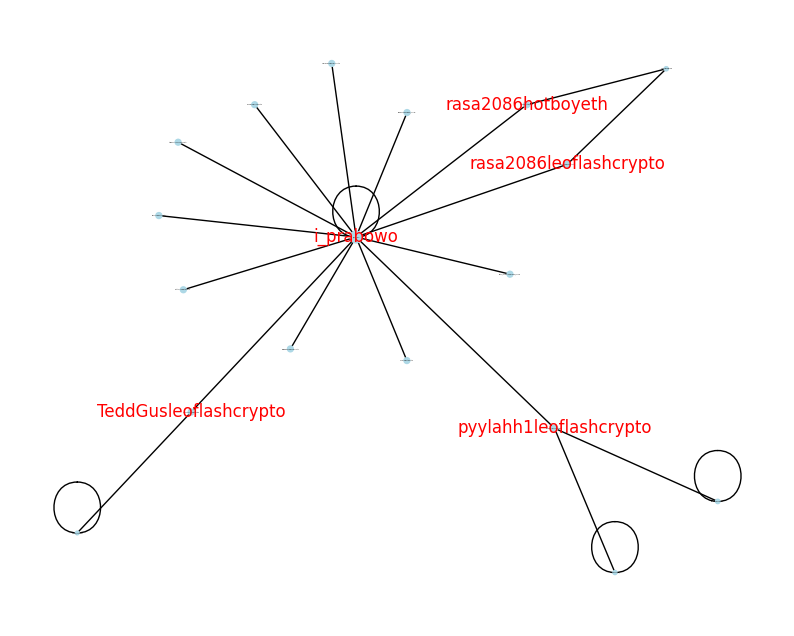

In [ ]:
plt.figure(figsize=(10, 8))

# Menentukan posisi entitas pada grafik
pos = nx.spring_layout(G, k=0.7)

# Menghitung eigenvecotr centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Mengurutkan simpul berdasarkan eigenvecotr centrality secara menurun
sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

# Memilih top 5 simpul dengan eigenvecotr centrality tertinggi
top_nodes = sorted_nodes[:5]

# Membuat subgraf berisi simpul top 5 dan tetangganya
subgraph_nodes = top_nodes.copy()
for node in top_nodes:
    subgraph_nodes += list(G.neighbors(node))
subgraph_nodes = list(set(subgraph_nodes))  # Menghilangkan duplikat simpul
subgraph = G.subgraph(subgraph_nodes)

# Mengatur ukuran node berdasarkan eigenvecotr centrality
node_size = [100 * eigenvector_centrality[node] for node in subgraph.nodes]

# Menggambar graf
pos = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, pos, with_labels=True, node_size=node_size, node_color='lightblue', font_color='black', font_size=1)

# Menambahkan label pada simpul top 5
labels = {node: node for node in top_nodes}
nx.draw_networkx_labels(subgraph, pos, labels, font_color='red', font_size=12)

# Menampilkan graf
plt.axis('off')
plt.show()


#Jawab 2E

HITS centrality nya gambarkan graph SNA nya.


In [ ]:
# Menghitung HITS Centrality
hits_centrality = link_analysis.hits_alg.hits(G)
authority_scores = hits_centrality[0]
hub_scores = hits_centrality[1]

highest_hub = max(authority_scores, key= authority_scores.get)
print("Entitas dengan Auth tertinggi:", highest_hub)
highest_auth = max(hub_scores, key= hub_scores.get)
print("Entitas dengan Hub tertinggi:", highest_auth)

Entitas dengan Auth tertinggi: i_prabowo
Entitas dengan Hub tertinggi: i_prabowo


Berdasarkan Authority

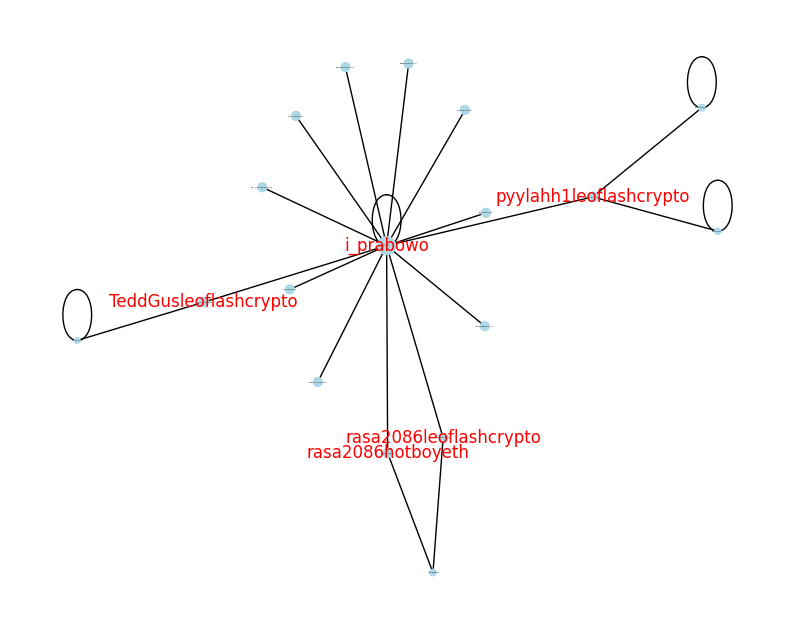

In [ ]:
plt.figure(figsize=(10, 8))

# Menentukan posisi entitas pada grafik
pos = nx.spring_layout(G, k=0.7)

# Mengurutkan simpul berdasarkan authority_scores secara menurun
sorted_nodes = sorted(authority_scores, key= authority_scores.get, reverse=True)

# Memilih top 5 simpul dengan authority_scores tertinggi
top_nodes = sorted_nodes[:5]

# Membuat subgraf berisi simpul top 5 dan tetangganya
subgraph_nodes = top_nodes.copy()
for node in top_nodes:
    subgraph_nodes += list(G.neighbors(node))
subgraph_nodes = list(set(subgraph_nodes))  # Menghilangkan duplikat simpul
subgraph = G.subgraph(subgraph_nodes)

# Mengatur ukuran node berdasarkan authority_scores
node_size = [1000 * authority_scores[node] for node in subgraph.nodes]

# Menggambar graf
pos = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, pos, with_labels=True, node_size=node_size, node_color='lightblue', font_color='black', font_size=1)

# Menambahkan label pada simpul top 5
labels = {node: node for node in top_nodes}
nx.draw_networkx_labels(subgraph, pos, labels, font_color='red', font_size=12)

# Menampilkan graf
plt.axis('off')
plt.show()


Berdasarkan Hub

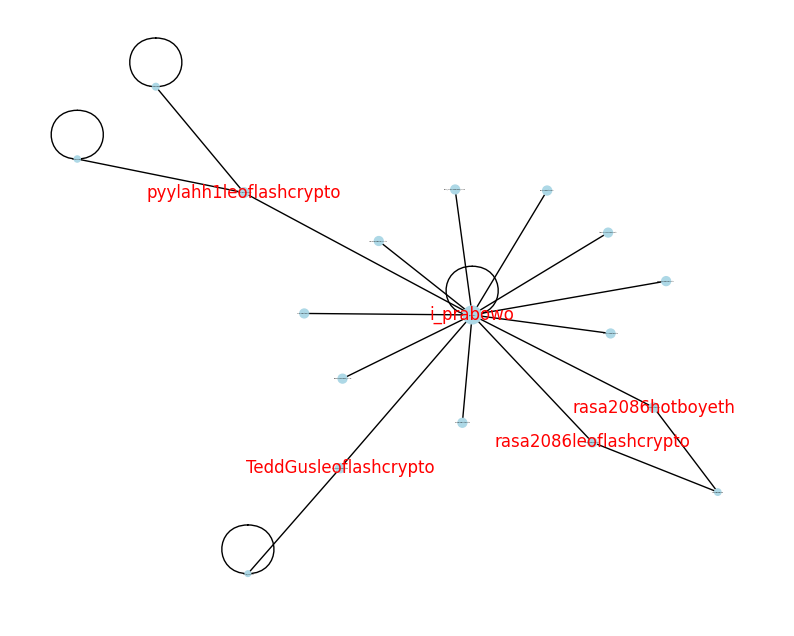

In [ ]:
plt.figure(figsize=(10, 8))

# Menentukan posisi entitas pada grafik
pos = nx.spring_layout(G, k=0.7)

# Mengurutkan simpul berdasarkan hub_scores secara menurun
sorted_nodes = sorted(hub_scores, key= hub_scores.get, reverse=True)

# Memilih top 5 simpul dengan hub_scores tertinggi
top_nodes = sorted_nodes[:5]

# Membuat subgraf berisi simpul top 5 dan tetangganya
subgraph_nodes = top_nodes.copy()
for node in top_nodes:
    subgraph_nodes += list(G.neighbors(node))
subgraph_nodes = list(set(subgraph_nodes))  # Menghilangkan duplikat simpul
subgraph = G.subgraph(subgraph_nodes)

# Mengatur ukuran node berdasarkan hub_scores
node_size = [1000 * hub_scores[node] for node in subgraph.nodes]

# Menggambar graf
pos = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, pos, with_labels=True, node_size=node_size, node_color='lightblue', font_color='black', font_size=1)

# Menambahkan label pada simpul top 5
labels = {node: node for node in top_nodes}
nx.draw_networkx_labels(subgraph, pos, labels, font_color='red', font_size=12)

# Menampilkan graf
plt.axis('off')
plt.show()


#Jawab 2F

Page rank centrality nya gambarkan graph SNA nya.


In [ ]:
#Menghitung pagerank centrality
pagerank_centrality = nx.pagerank(G)
highest_pagerank = max(pagerank_centrality, key= pagerank_centrality.get)
print("Entitas dengan pagerank centrality tertinggi:", highest_pagerank)

Entitas dengan pagerank centrality tertinggi: i_prabowo


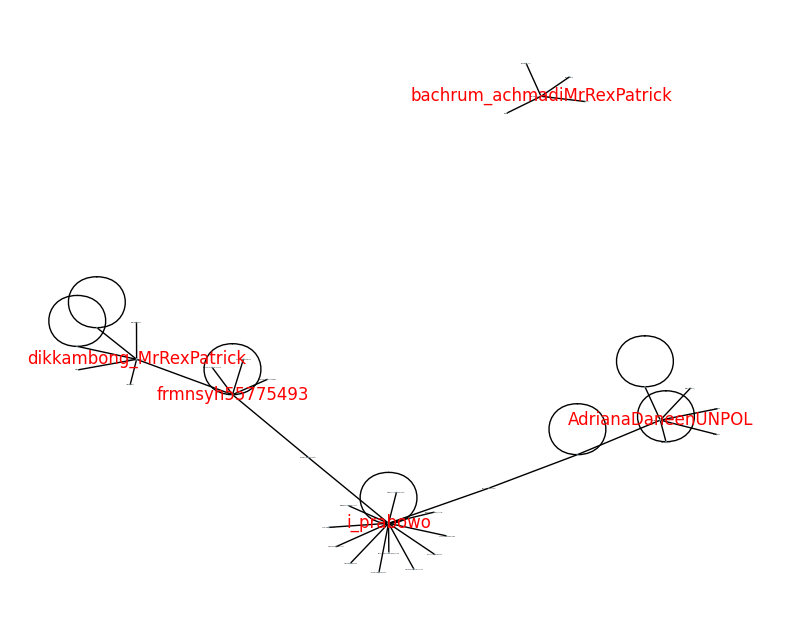

In [ ]:
plt.figure(figsize=(10, 8))

# Menentukan posisi entitas pada grafik
pos = nx.spring_layout(G, k=0.7)

# Menghitung pagerank centrality
pagerank_centrality = nx.pagerank(G)

# Mengurutkan simpul berdasarkan pagerank centrality secara menurun
sorted_nodes = sorted(pagerank_centrality, key=pagerank_centrality.get, reverse=True)

# Memilih top 5 simpul dengan pagerank centrality tertinggi
top_nodes = sorted_nodes[:5]

# Membuat subgraf berisi simpul top 5 dan tetangganya
subgraph_nodes = top_nodes.copy()
for node in top_nodes:
    subgraph_nodes += list(G.neighbors(node))
subgraph_nodes = list(set(subgraph_nodes))  # Menghilangkan duplikat simpul
subgraph = G.subgraph(subgraph_nodes)

# Mengatur ukuran node berdasarkan pagerank centrality
node_size = [100 * pagerank_centrality[node] for node in subgraph.nodes]

# Menggambar graf
pos = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, pos, with_labels=True, node_size=node_size, node_color='lightblue', font_color='black', font_size=1)

# Menambahkan label pada simpul top 5
labels = {node: node for node in top_nodes}
nx.draw_networkx_labels(subgraph, pos, labels, font_color='red', font_size=12)

# Menampilkan graf
plt.axis('off')
plt.show()


#Jawab 2G

Modularity Centrality nya gambarkan graph SNA nya

In [ ]:
import community
from community import community_louvain

# Menjalankan algoritma Louvain
partition = community_louvain.best_partition(G)

# Menghitung modularity menggunakan partisi yang ditemukan
modularity = community_louvain.modularity(partition, G)

# Mendapatkan komunitas dengan modularity tertinggi
highest_modularity_community = max(partition.values())

# Menampilkan simpul-simpul dalam komunitas dengan modularity tertinggi
nodes_in_highest_modularity_community = [node for node, community_id in partition.items() if community_id == highest_modularity_community]
print("modularity tertinggi:", nodes_in_highest_modularity_community)


modularity tertinggi: ['EgoriaAl']


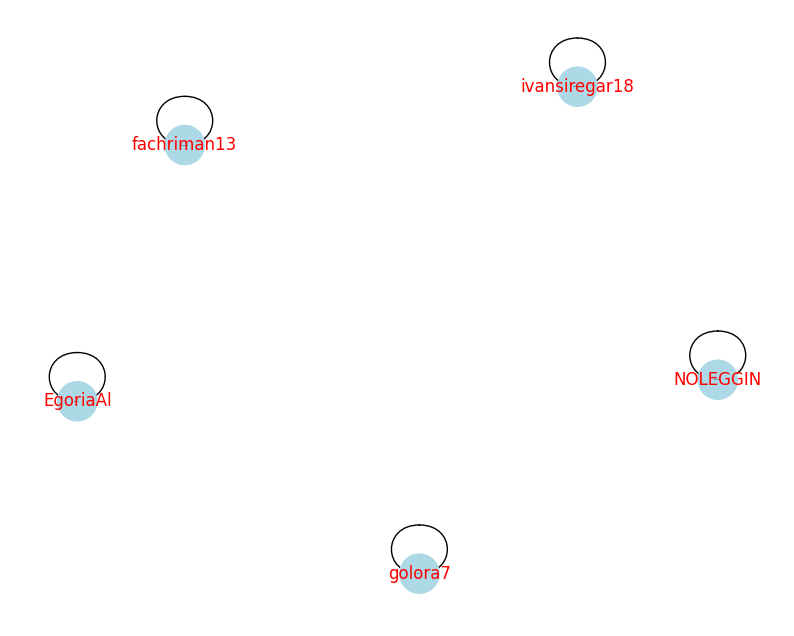

In [ ]:
# Menjalankan algoritma Louvain
partition = community_louvain.best_partition(G)

# Menghitung modularity menggunakan partisi yang ditemukan
modularity = community_louvain.modularity(partition, G)

plt.figure(figsize=(10, 8))

# Menentukan posisi entitas pada grafik
pos = nx.spring_layout(G, k=0.7)

# Mengurutkan simpul berdasarkan partisi komunitas
sorted_nodes = sorted(partition, key=partition.get, reverse=True)

# Memilih top 5 simpul dengan komunitas tertinggi
top_nodes = sorted_nodes[:5]

# Membuat subgraf berisi simpul top 5 dan tetangganya
subgraph_nodes = top_nodes.copy()
for node in top_nodes:
    subgraph_nodes += list(G.neighbors(node))
subgraph_nodes = list(set(subgraph_nodes))  # Menghilangkan duplikat simpul
subgraph = G.subgraph(subgraph_nodes)

# Mengatur ukuran node berdasarkan Degree Centrality
node_size = [1 * partition[node] for node in subgraph.nodes]

# Menggambar graf
pos = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, pos, with_labels=True, node_size=node_size, node_color='lightblue', font_color='black', font_size=1)

# Menambahkan label pada simpul top 5
labels = {node: node for node in top_nodes}
nx.draw_networkx_labels(subgraph, pos, labels, font_color='red', font_size=12)

# Menampilkan graf
plt.axis('off')
plt.show()


#3. Simpulkan dari hasil Graph A-G pada soal 2

Entitas dengan betweennes centrality tertinggi: i_prabowo\
Entitas dengan closeness centrality tertinggi: i_prabowo\
Entitas dengan degree centrality tertinggi: i_prabowo\
Entitas dengan eigenvector centrality tertinggi: i_prabowo\
Entitas dengan Auth tertinggi: i_prabowo\
Entitas dengan Hub tertinggi: i_prabowo\
Entitas dengan pagerank centrality tertinggi: i_prabowo\
Entitas dengan modularity tertinggi: EgoriaAl

#Kesimpulan
Nodes i_prabowo menjadi akun yang paling penting berdasarkan 6 algoritma yang dilakukan. i_prabowo hanya berdasarkan modularity_centrality yang tidak menjadi paling berpengaruh.

Berdasarkan hasil yang diberikan, terdapat entitas dengan nama "i_prabowo" yang memiliki nilai tertinggi dalam berbagai metrik sentralitas dan peran dalam jaringan. Berikut adalah interpretasi untuk masing-masing metrik:

1. Betweenness Centrality:
   - Entitas "i_prabowo" memiliki nilai betweenness centrality tertinggi, yang menandakan bahwa entitas ini berperan penting dalam menghubungkan simpul-simpul lain dalam jaringan. Entitas ini berada di jalur komunikasi yang banyak dilalui antara simpul-simpul lain.

2. Closeness Centrality:
   - Entitas "i_prabowo" memiliki nilai closeness centrality tertinggi, yang menunjukkan bahwa entitas ini memiliki jarak terpendek ke simpul-simpul lain dalam jaringan. Hal ini menandakan bahwa entitas ini memiliki aksesibilitas yang tinggi dalam menghubungkan dirinya dengan simpul-simpul lainnya.

3. Degree Centrality:
   - Entitas "i_prabowo" memiliki nilai degree centrality tertinggi, yang mengindikasikan bahwa entitas ini memiliki jumlah keterhubungan yang paling banyak dengan simpul-simpul lain dalam jaringan. Entitas ini memiliki banyak koneksi langsung dengan simpul-simpul lainnya.

4. Eigenvector Centrality:
   - Entitas "i_prabowo" memiliki nilai eigenvector centrality tertinggi, yang menunjukkan bahwa entitas ini memiliki pengaruh yang kuat dalam jaringan. Keberadaan entitas ini dapat mempengaruhi secara signifikan simpul-simpul lainnya dalam jaringan.

5. Authority (Auth) Centrality:
   - Entitas "i_prabowo" memiliki nilai authority centrality tertinggi dalam model HITS (Hyperlink-Induced Topic Search), yang menunjukkan bahwa entitas ini dianggap sebagai otoritas dalam jaringan. Entitas ini sering dihubungkan dengan simpul-simpul lain yang dianggap sebagai sumber informasi atau otoritas lainnya.

6. Hub Centrality:
   - Entitas "i_prabowo" memiliki nilai hub centrality tertinggi dalam model HITS, yang menunjukkan bahwa entitas ini berperan sebagai penghubung atau titik sentral dalam menghubungkan ke simpul-simpul lain yang dianggap sebagai otoritas.

7. PageRank Centrality:
   - Entitas "i_prabowo" memiliki nilai pagerank centrality tertinggi, yang menandakan bahwa entitas ini dianggap sebagai entitas yang penting atau berpengaruh dalam jaringan. Entitas ini memiliki peran yang signifikan dalam menentukan peringkat atau tingkat pentingnya dalam jaringan.

8. Modularity:
   - Entitas "EgoriaAl" memiliki modularity tertinggi, yang menunjukkan bahwa entitas ini termasuk dalam komunitas yang sangat terkait erat. Dalam konteks modularity, entitas ini memiliki banyak koneksi internal yang kuat dan sedikit koneksi dengan entitas di luar komunitasnya.
